<a href="https://colab.research.google.com/github/Reneress/Mestrado_Mineracao/blob/main/Atividade_1_leonardo_Vinicius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Atividade 1 - Pré-Processamento: Análise do Dataset Census Income

## 📝 Introdução
Este projeto tem como objetivo realizar o pré-processamento do *Census Income Dataset* (Adult Dataset). O foco será tratar valores ausentes, codificar variáveis categóricas e normalizar os dados numéricos, preparando o dataset para análises e modelagem preditiva futuras.

## 📁 Descrição do Conjunto de Dados
- **Nome do Dataset:** Census Income (Adult Dataset)
- **Número de Instâncias:** 32.561
- **Número de Atributos:** 14
- **Tipos de Atributos:** Categóricos e Numéricos
- **Tarefa Associada:** Classificação
- **Variável Alvo:** `income` (<=50K ou >50K)

## 🔍 Análise Exploratória
### Visualização Inicial dos Dados
Será realizada uma análise inicial para entender a estrutura do dataset e suas variáveis principais, identificando possíveis valores ausentes.

## 🛠️ Pré-processamento de Dados
### Tratamento de Valores Ausentes
Substituição ou remoção de valores ausentes nas colunas categóricas utilizando a estratégia de imputação mais adequada.

### Codificação de Variáveis Categóricas
Aplicação de One-Hot Encoding para transformar variáveis categóricas em numéricas, facilitando a análise e a modelagem.

### Escalonamento de Variáveis Numéricas
Normalização ou padronização das variáveis numéricas para garantir consistência nos dados, preparando-os para modelos preditivos.

## 📊 Visualização dos Dados
Análise das distribuições das variáveis e das correlações entre elas, utilizando visualizações gráficas como pair plots e heatmaps.

## 📝 Conclusão
O pré-processamento do *Census Income Dataset* foi realizado com sucesso, permitindo que os dados estejam prontos para futuras análises e modelagens preditivas.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

# Caminho para o arquivo
# file = '/content/drive/My Drive/0-Dataset/Mineração/Atividade/adult.data'
file = '/content/drive/MyDrive/Mestrado/Base de dados/adult.data'

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

df = pd.read_csv(file, sep=',', names=column_names, na_values=' ?', low_memory=False)

# Verificar as primeiras linhas e as colunas
print(df.head(10))
print(df.info())
print(df.isnull().sum())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3  

📊 Verificação de Normalidade


Testes de Normalidade
Testes de normalidade (Shapiro-Wilk e KS-Test) foram realizados para verificar se os dados seguem uma distribuição normal.

In [ ]:
from scipy.stats import shapiro, kstest

# Teste de Shapiro-Wilk
stat, p = shapiro(df['age'])
print('Estatística=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Amostra segue a distribuição normal (não rejeita H0)')
else:
    print('Amostra não segue a distribuição normal (rejeita H0)')

# Teste KS
stat, p = kstest(df['age'], 'norm')
print('Estatística=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Amostra segue a distribuição normal (não rejeita H0)')
else:
    print('Amostra não segue a distribuição normal (rejeita H0)')


Estatística=0.967, p=0.000
Amostra não segue a distribuição normal (rejeita H0)
Estatística=1.000, p=0.000
Amostra não segue a distribuição normal (rejeita H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 32561.
  res = hypotest_fun_out(*samples, **kwds)


Gráficos de Probabilidade
Gráficos de probabilidade foram gerados para checar a suposição de normalidade dos dados.

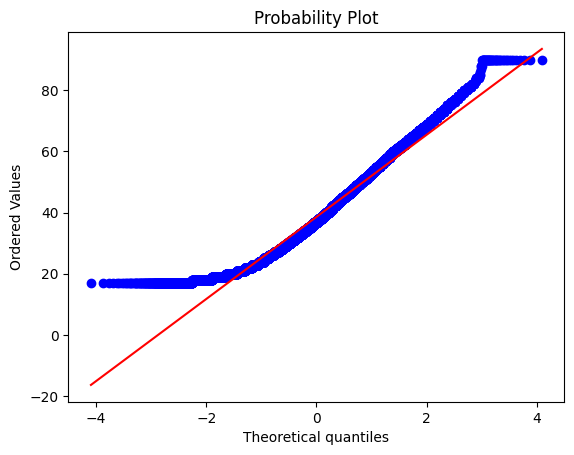

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Gráfico de probabilidade da Normal
stats.probplot(df['age'], plot=plt)
plt.show()


## Verificar Valores Faltantes

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64
Porcentagem de valores faltantes por coluna:
occupation        5.660146
workclass         5.638647
native-country    1.790486
dtype: float64


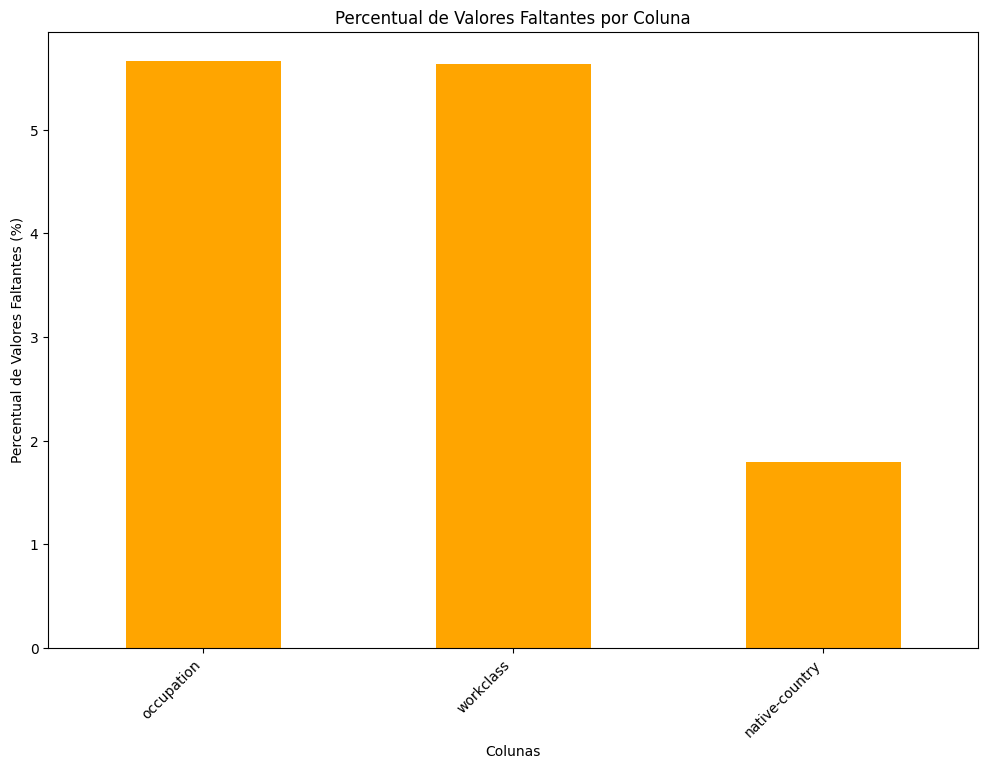

In [ ]:
#Quantidade de valores faltantes
valores_faltantes = df.isnull().sum()
print(valores_faltantes)

# Calcular a porcentagem de valores faltantes em cada coluna
percentual_faltantes = df.isnull().mean() * 100

# Filtrar apenas as colunas que possuem valores faltantes
colunas_faltantes = percentual_faltantes[percentual_faltantes > 0].sort_values(ascending=False)

# Exibir a porcentagem de valores faltantes por coluna
print("Porcentagem de valores faltantes por coluna:")
print(colunas_faltantes)

# Visualização com gráfico de barras
plt.figure(figsize=(12, 8))
colunas_faltantes.plot(kind='bar', color='orange')
plt.title('Percentual de Valores Faltantes por Coluna')
plt.xlabel('Colunas')
plt.ylabel('Percentual de Valores Faltantes (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

## PCA

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


# Passo 1: Tratar valores faltantes em variáveis categóricas
# Substituindo valores faltantes pela moda (a categoria mais frequente)
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Passo 2: Separar variáveis categóricas e numéricas
colunas_categoricas = df.select_dtypes(include=['object', 'category']).columns
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Passo 3: Criar o transformador para variáveis categóricas e numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), colunas_numericas),
        ('cat', OneHotEncoder(), colunas_categoricas)
    ]
)

# Passo 4: Criar o pipeline com PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2))  # Ajuste o número de componentes principais conforme necessário
])

# Passo 5: Ajustar e transformar os dados
componentes_principais = pipeline.fit_transform(df)

# Passo 6: Criar um DataFrame com os componentes principais
df_pca = pd.DataFrame(data=componentes_principais, columns=['PC1', 'PC2'])

# Passo 7: Visualizar os componentes principais
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c='blue', edgecolor='k', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA: Componente Principal 1 vs Componente Principal 2')
plt.grid()
plt.show()

# Passo 8: Explicar a variância explicada por cada componente principal
print("Variância explicada por cada componente principal:")
pca = pipeline.named_steps['pca']
print(pca.explained_variance_ratio_)


TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.